<a href="https://colab.research.google.com/github/ShareAndShine/DevOpsPOC/blob/master/Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read data
path = '/gdrive/My Drive/Online_ML : Aug 2021/data/'
data = pd.read_csv(path+'online_shoppers_intention.csv');
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Review the data and label encode input features that can be categorized (remember we cannot work with text)

from sklearn.preprocessing import LabelEncoder

Month_encoder = LabelEncoder()
data['Month'] =  Month_encoder.fit_transform(data['Month'])

VisitorType_encoder = LabelEncoder()
data['VisitorType'] =  VisitorType_encoder.fit_transform(data['VisitorType'])

Weekend_encoder = LabelEncoder()
data['Weekend'] =  Weekend_encoder.fit_transform(data['Weekend'])

Revenue_encoder = LabelEncoder()
data['Revenue'] =  Revenue_encoder.fit_transform(data['Revenue'])

In [6]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [10]:
# Split output and input 
ycol = data['Revenue'] # output
xcol = data.drop(columns=['Revenue']) #input 
xcol.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [11]:
# Covert input features and output into an array
x = np.array(xcol)
y = np.array(ycol)
x.shape, y.shape

((12330, 17), (12330,))

In [12]:
# Spilt train and test data

from sklearn.model_selection import train_test_split #use this lib to split records into train and test and use it for model prediction accuracy. This is a general appraoch followed in ML
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=2) # test_size = 0.25 is used to take 25% of overall data for testing. random_state will pick random rows for test and train
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((9247, 17), (3083, 17), (9247,), (3083,))

**Implement Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression # import package

log_reg = LogisticRegression(max_iter = 3000)
log_reg = log_reg.fit(x_train, y_train)

In [50]:
# predict with test data

yt_pred_log_reg = log_reg.predict(x_test)

# import accuracy score package
from sklearn.metrics import classification_report, accuracy_score # import package
print('**** Classification Report - Logistic Regression ****')
print(classification_report(y_test, yt_pred_log_reg))

# calculate accuracy
ac = accuracy_score(y_test, yt_pred_log_reg)
print('Test data accuracy {0}'.format(ac *100))


**** Classification Report - Logistic Regression ****
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2639
           1       0.69      0.37      0.49       444

    accuracy                           0.89      3083
   macro avg       0.80      0.67      0.71      3083
weighted avg       0.87      0.89      0.87      3083

Test data accuracy 88.582549464807


**Implement Naive Byes Alogorithum**

In [29]:
from sklearn.naive_bayes import ComplementNB
NB_comp = ComplementNB()
NB_comp = NB_comp.fit(x_train, y_train)

y_pred_NB_comp = NB_comp.predict(x_test)

# Print Classification report between test output and NB predicted values
from sklearn.metrics import classification_report
print('**** Classification Report - Naive Bayes ****')
print(classification_report(y_test, y_pred_NB_comp))


**** Classification Report - Naive Bayes ****
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2639
           1       0.55      0.62      0.59       444

    accuracy                           0.87      3083
   macro avg       0.74      0.77      0.76      3083
weighted avg       0.88      0.87      0.88      3083



**Implement Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

dtree.fit(x_train, y_train)

y_pred_dtree = dtree.predict(x_test)

# Print Classification report between test output and NB predicted values
from sklearn.metrics import classification_report
print('**** Classification Report - Decision Tree ****')
print(classification_report(y_test, y_pred_dtree))



**** Classification Report - Decision Tree ****
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2639
           1       0.52      0.59      0.56       444

    accuracy                           0.86      3083
   macro avg       0.73      0.75      0.74      3083
weighted avg       0.87      0.86      0.87      3083



**AUC & ROC Curve - Use them to find which model is good**

In [54]:
# Find probability first which we can use later below for finding True postive and False possible rate

logreg_probs = log_reg.predict_proba(x_test)
NB_comp_probs = NB_comp.predict_proba (x_test)
dtree_probs = dtree.predict_proba(x_test)


In [55]:
# Keep proability for only positive outcomes only as we need only true postive and false postive for caluculation

logreg_probs = logreg_probs[:, 1] # All rows and first col
NB_comp_probs = NB_comp_probs[:, 1] # All rows and first col
dtree_probs = dtree_probs[:, 1] # All rows and first col

In [56]:
# Calcualte AUC score - A way to measure which model is good of the above 3

from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, logreg_probs)

NB_comp_auc = roc_auc_score(y_test, NB_comp_probs)

dtree_auc = roc_auc_score(y_test, dtree_probs)

print('Logistic Regression model ROC accuracy score:: {0} %'.format(round(logreg_auc,3)*100))

print('Naive Bayes model ROC accuracy score:: {0} %'.format(round(NB_comp_auc,3)*100))

print('Decision Tree  model ROC Accuracy score:: {0} %'.format(round(dtree_auc,3)*100))

Logistic Regression model ROC accuracy score:: 88.0 %
Naive Bayes model ROC accuracy score:: 76.2 %
Decision Tree  model ROC Accuracy score:: 75.1 %


**Plot as a graph and see how each model helps with prediction **

In [59]:
# Find True +ve (tpr) and False +ve (fpr) rate for plotting ROC curve for all 3 models

from sklearn.metrics import roc_curve

logreg_fpr, logreg_tpr, logreg_threshold = roc_curve(y_test, logreg_probs) # assign True +ve (tpr) and False +ve (fpr) rate to variables

NB_comp_fpr, NB_comp_tpr, NB_comp_threshold = roc_curve(y_test, NB_comp_probs) # assign True +ve (tpr) and False +ve (fpr) rate to variables

dtree_fpr, dtree_tpr, dtree_threshold = roc_curve(y_test, dtree_probs) # assign True +ve (tpr) and False +ve (fpr) rate to variables


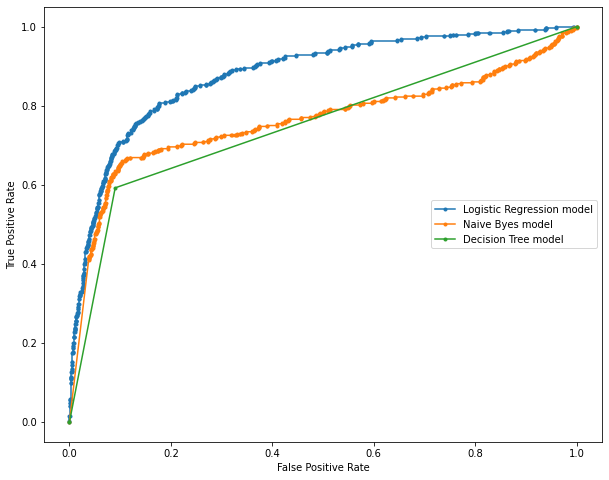

In [68]:
# Start plotting the graph

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression model')
ax.plot(NB_comp_fpr, NB_comp_tpr, marker='.', label='Naive Byes model')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label='Decision Tree model')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend(loc=5)

# Show plot
plt.show()

**Introducing a new model which has mix of algorithum to see if it shows better predicion. Once such algorithum us "Random Forest Clssification"**

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Set iteration
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
# Predict with test data
y_pred_rf = rf.predict(x_test)

# Get Classification report and see for accuracy

from sklearn.metrics import classification_report
print('**** Classification Report - Random Forest ****')
print(classification_report(y_test, y_pred_rf)) # Feed test output and random forest predicted values


**** Classification Report - Random Forest ****
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2639
           1       0.72      0.59      0.65       444

    accuracy                           0.91      3083
   macro avg       0.82      0.78      0.80      3083
weighted avg       0.90      0.91      0.90      3083



In [74]:
# Find AUC socre & ROC Curve

# Find probability first which we can use later below for finding True postive and False possible rate
rf_probs = rf.predict_proba(x_test) 

# Keep proability for only positive outcomes only as we need only true postive and false postive for caluculation
rf_probs = rf_probs[:, 1] # All rows and first col

# Calcualte AUC score - A way to measure model effectiveness score
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest model ROC accuracy score:: {0} %'.format(round(rf_auc,3)*100))

Random Forest model ROC accuracy score:: 92.10000000000001 %


In [75]:
# Find True +ve (tpr) and False +ve (fpr) rate for plotting ROC curve
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_probs) # assign True +ve (tpr) and False +ve (fpr) rate to variables

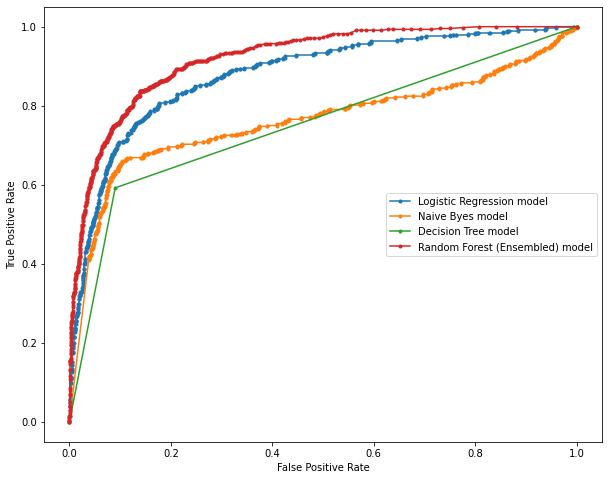

In [76]:
# Start plotting the graph including Random forest model and see how its performace over other models

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression model')
ax.plot(NB_comp_fpr, NB_comp_tpr, marker='.', label='Naive Byes model')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label='Decision Tree model')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (Ensembled) model')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend(loc=5)

# Show plot
plt.show()